In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
'!cp -r /content/drive/MyDrive/Filtered_Tumore_Data /content/'

'!cp -r /content/drive/MyDrive/Filtered_Tumore_Data /content/'

In [ ]:
'/content/drive/MyDrive/Filtered_Tumore_Data'

'/content/drive/MyDrive/Filtered_Tumore_Data'

In [ ]:
'/content/Filtered_Tumore_Data'

'/content/Filtered_Tumore_Data'

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
!cp -r /content/drive/MyDrive/Filtered_Tumore_Data /content/

In [ ]:
!ls /content/Filtered_Tumore_Data

Train  Validation


In [ ]:
!ls /content/Filtered_Tumore_Data/*

/content/Filtered_Tumore_Data/Train:
EA  NE

/content/Filtered_Tumore_Data/Validation:
EA  NE


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/Filtered_Tumore_Data/Train',
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/Filtered_Tumore_Data/Validation',
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)


Found 1176 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


In [ ]:
!ls /content/Filtered_Tumore_Data

Train  Validation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Filtered_Tumore_Data/Train',
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/Filtered_Tumore_Data/Validation',
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

Found 1176 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

vgg = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=output)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('/content/drive/MyDrive/una_best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)


In [ ]:
import time

start = time.time()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint]
)

end = time.time()

print(f"Total training time: {(end - start)/60:.2f} minutes")
print(f"Average time per epoch: {(end - start)/10:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6799 - loss: 1.0843
Epoch 1: val_accuracy improved from -inf to 0.82968, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 978ms/step - accuracy: 0.6813 - loss: 1.0741 - val_accuracy: 0.8297 - val_loss: 0.3587
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8444 - loss: 0.3562
Epoch 2: val_accuracy improved from 0.82968 to 0.90472, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 377ms/step - accuracy: 0.8445 - loss: 0.3562 - val_accuracy: 0.9047 - val_loss: 0.2429
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.8817 - loss: 0.2835
Epoch 3: val_accuracy improved from 0.90472 to 0.94266, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 354ms/step - accuracy: 0.8818 - loss: 0.2833 - val_accuracy: 0.9427 - val_loss: 0.1798
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9021 - loss: 0.2367
Epoch 4: val_accuracy did not improve from 0.94266
37/37 ━━━━━━━━━━━━━━━━━━━━ 20s 336ms/step - accuracy: 0.9023 - loss: 0.2365 - val_accuracy: 0.9401 - val_loss: 0.1804
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8941 - loss: 0.2574
Epoch 5: val_accuracy improved from 0.94266 to 0.96374, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 377ms/step - accuracy: 0.8942 - loss: 0.2573 - val_accuracy: 0.9637 - val_loss: 0.1294
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9218 - loss: 0.1815
Epoch 6: val_accuracy improved from 0.96374 to 0.97133, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 462ms/step - accuracy: 0.9220 - loss: 0.1812 - val_accuracy: 0.9713 - val_loss: 0.0881
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9378 - loss: 0.1725
Epoch 7: val_accuracy improved from 0.97133 to 0.97892, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 464ms/step - accuracy: 0.9379 - loss: 0.1724 - val_accuracy: 0.9789 - val_loss: 0.0968
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9630 - loss: 0.1260
Epoch 8: val_accuracy improved from 0.97892 to 0.98314, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.9629 - loss: 0.1260 - val_accuracy: 0.9831 - val_loss: 0.0789
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9604 - loss: 0.1182
Epoch 9: val_accuracy improved from 0.98314 to 0.99325, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step - accuracy: 0.9605 - loss: 0.1180 - val_accuracy: 0.9933 - val_loss: 0.0433
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9697 - loss: 0.0883
Epoch 10: val_accuracy improved from 0.99325 to 0.99578, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 463ms/step - accuracy: 0.9697 - loss: 0.0887 - val_accuracy: 0.9958 - val_loss: 0.0467
Total training time: 3.99 minutes
Average time per epoch: 23.95 seconds


In [ ]:
# Import required libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Set path to dataset (local Colab path after copying from Drive)
base_path = '/content/Filtered_Tumore_Data'
train_path = os.path.join(base_path, 'Train')
val_path = os.path.join(base_path, 'Validation')

# Create Image Generators
img_size = (224, 224)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

# Load VGG16 base model without top layers
vgg = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# Freeze base layers
for layer in vgg.layers:
    layer.trainable = False

# Add custom classifier layers
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=vgg.input, outputs=output)

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Optional: Save best model
checkpoint = ModelCheckpoint('/content/drive/MyDrive/una_best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint]
)

Found 1176 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.
Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5949 - loss: 1.5923
Epoch 1: val_accuracy improved from -inf to 0.85329, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 429ms/step - accuracy: 0.5980 - loss: 1.5761 - val_accuracy: 0.8533 - val_loss: 0.3610
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8388 - loss: 0.3694
Epoch 2: val_accuracy improved from 0.85329 to 0.90894, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 449ms/step - accuracy: 0.8391 - loss: 0.3687 - val_accuracy: 0.9089 - val_loss: 0.2281
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8711 - loss: 0.2945
Epoch 3: val_accuracy improved from 0.90894 to 0.94098, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 454ms/step - accuracy: 0.8715 - loss: 0.2945 - val_accuracy: 0.9410 - val_loss: 0.2031
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9053 - loss: 0.2487
Epoch 4: val_accuracy improved from 0.94098 to 0.96037, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 355ms/step - accuracy: 0.9056 - loss: 0.2481 - val_accuracy: 0.9604 - val_loss: 0.1509
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9232 - loss: 0.2040
Epoch 5: val_accuracy did not improve from 0.96037
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - accuracy: 0.9234 - loss: 0.2036 - val_accuracy: 0.9604 - val_loss: 0.1226
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9376 - loss: 0.1721
Epoch 6: val_accuracy improved from 0.96037 to 0.97808, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 373ms/step - accuracy: 0.9378 - loss: 0.1720 - val_accuracy: 0.9781 - val_loss: 0.0982
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9430 - loss: 0.1719
Epoch 7: val_accuracy improved from 0.97808 to 0.98145, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - accuracy: 0.9432 - loss: 0.1713 - val_accuracy: 0.9815 - val_loss: 0.0846
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9580 - loss: 0.1170
Epoch 8: val_accuracy did not improve from 0.98145
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 350ms/step - accuracy: 0.9581 - loss: 0.1169 - val_accuracy: 0.9798 - val_loss: 0.0952
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9633 - loss: 0.1052
Epoch 9: val_accuracy improved from 0.98145 to 0.99241, saving model to /content/drive/MyDrive/una_best_model.h5


37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 420ms/step - accuracy: 0.9632 - loss: 0.1053 - val_accuracy: 0.9924 - val_loss: 0.0498
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.9721 - loss: 0.0854
Epoch 10: val_accuracy did not improve from 0.99241
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 465ms/step - accuracy: 0.9721 - loss: 0.0854 - val_accuracy: 0.9899 - val_loss: 0.0489


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/una_best_model.h5')

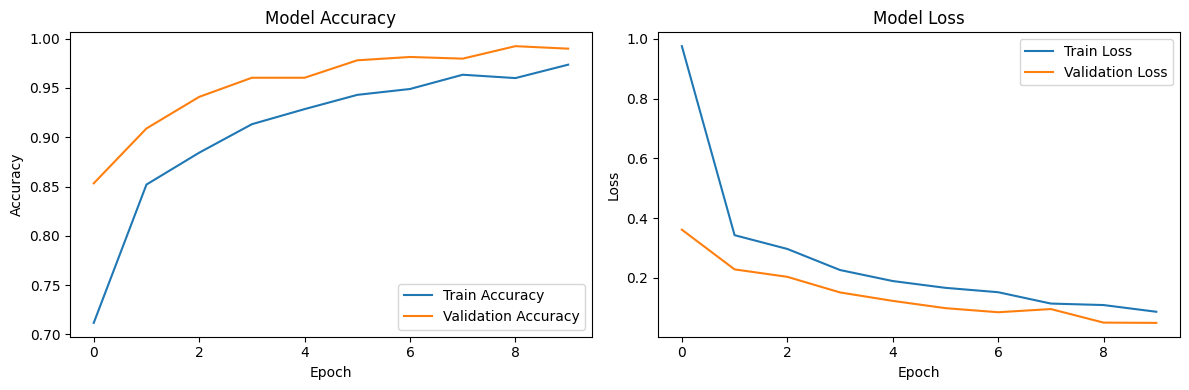

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.8 MB/s eta 0:00:00


In [1]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/drive/MyDrive/una_best_model.h5')

# Define prediction function
def predict_uterine_image(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Cancer Positive" if prediction > 0.5 else "Cancer Negative"
    confidence = f"{max(prediction, 1 - prediction) * 100:.2f}%"

    return f"{label} (Confidence: {confidence})"

# Gradio interface
interface = gr.Interface(
    fn=predict_uterine_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Uterine Neoplasm Analyzer (UNA)",
    description="Upload a uterine scan to predict if it's Cancer Positive or Negative"
)

# Launch the app
interface.launch()

ModuleNotFoundError: No module named 'gradio'